<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
#Basic Information
print(df.info())

#SUmmary Statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.3432

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
## Write your code here

#Identify missing values for all columns.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())
    

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



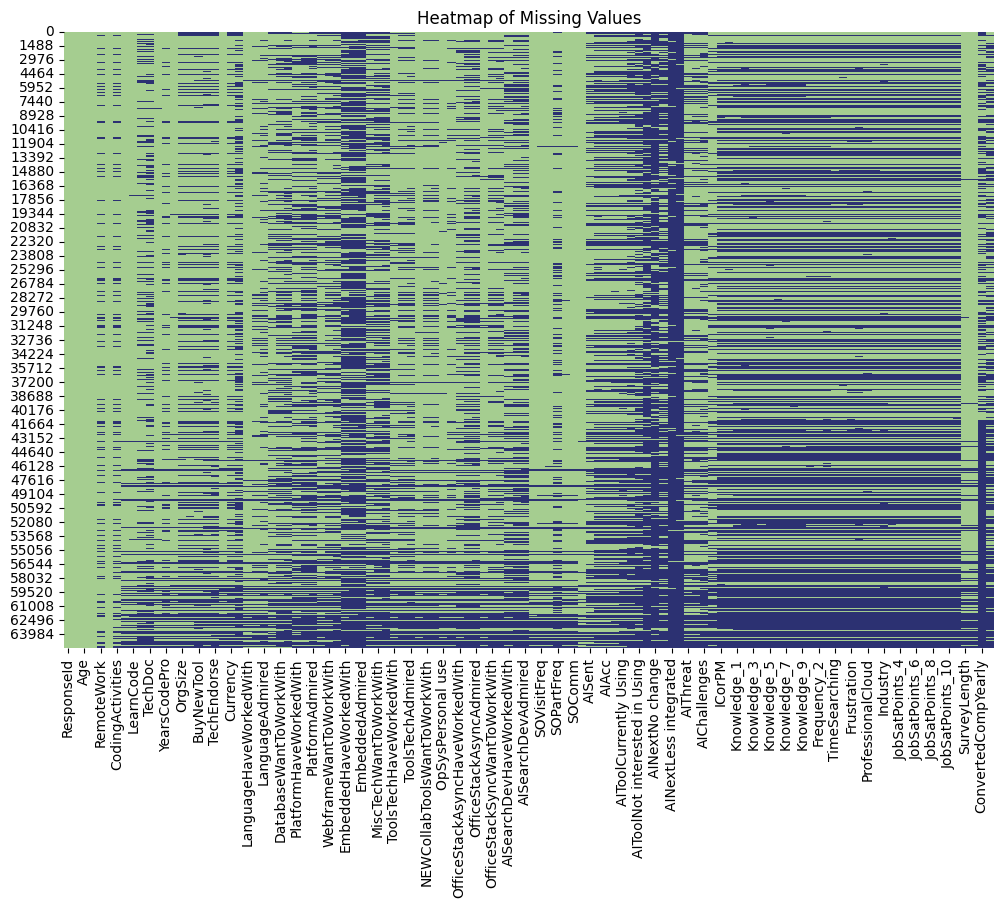

In [6]:
## Write your code here

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
#glue = sns.load_dataset(df.isnull())
#sns.heatmap(glue, annot=True)
sns.heatmap(df.isnull(), cbar=False, cmap='crest')
plt.title('Heatmap of Missing Values')
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [7]:
## Write your code here
print("Missing rows count for RemoteWork column : ", df['RemoteWork'].isnull().sum())


Missing rows count for RemoteWork column :  10631


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [8]:
## Write your code here
MissingVal_RW = df['RemoteWork'].mode()[0]
print("Most frequent value in RemoteWork column : ", MissingVal_RW)

Most frequent value in RemoteWork column :  Hybrid (some remote, some in-person)


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [9]:
## Write your code here
print("Missing rows count for RemoteWork column before update : ", df['RemoteWork'].isnull().sum())
df['RemoteWork'].fillna(MissingVal_RW, inplace=True)
print("Missing rows count for RemoteWork column after missing values update update : ", df['RemoteWork'].isnull().sum())
                        

Missing rows count for RemoteWork column before update :  10631
Missing rows count for RemoteWork column after missing values update update :  0


/tmp/ipykernel_1147/1255577643.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(MissingVal_RW, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


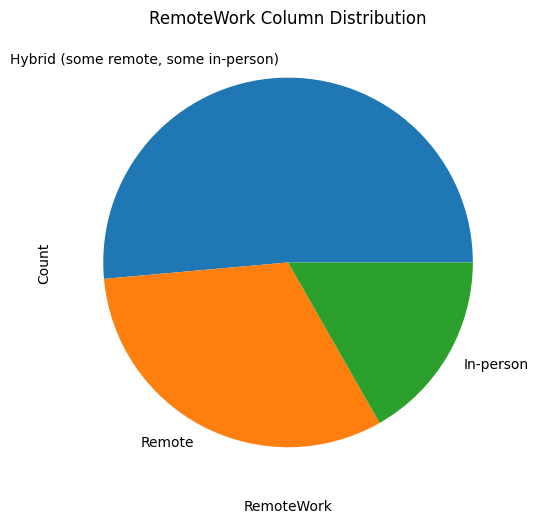

In [16]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Simplify the visualization of the Employment column distribution after imputation
plt.figure(figsize=(10, 6))
RW_Dist=df['RemoteWork'].value_counts()
RW_Dist.plot(kind='pie')
plt.title('RemoteWork Column Distribution')
plt.xlabel('RemoteWork')
plt.ylabel('Count')
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
